### <center> 2. Убираем повторяющиеся значения

Чтобы получить уникальные значения из столбца, воспользуемся ключевым словом `DISTINCT`.

```sql
SELECT DISTINCT
    type1
FROM sql.pokemon
```

Мы можем применять `DISTINCT` и для нескольких столбцов.

Получим, например, все уникальные пары основного и дополнительного типов для покемонов.

```sql
SELECT DISTINCT
    type1,
    type2
FROM sql.pokemon
```

>**Обратите внимание!** `DISTINCT` пишется только один раз, в начале списка получаемых столбцов.


### <center> 3. Агрегатные функции

✍ Кроме простых математических операций, которые мы использовали в предыдущем модуле, СУБД позволяет проводить статистические вычисления для нескольких строк.

Давайте посчитаем количество строк в таблице. Для этого применим агрегатную функцию `COUNT`.

```sql
SELECT
    COUNT(*)
FROM sql.pokemon /*считаются все строки, которые возвращает запрос*/
```

Если в аргументе функции указать название столбца, функция обработает **только строки с непустым значением**.

Внутри функции `COUNT` мы можем также применять `DISTINCT`, чтобы вычислить количество уникальных значений.

```sql
SELECT
    COUNT(DISTINCT type1) /*функция подсчёта строк; уникальные значения столбца type1*/
FROM sql.pokemon
```

**Основные агрегатные функции:**

- `COUNT` — вычисляет число непустых строк;
- `SUM` — вычисляет сумму;
- `AVG` — вычисляет среднее;
- `MAX` — вычисляет максимум;
- `MIN` — вычисляет минимум.

**Задание 3.3**

Найти максимальное значение атаки среди всех покемонов

```sql
SELECT 
    MAX(attack)
FROM sql.pokemon
```

>Разумеется, вы можете использовать в запросе фильтрацию строк с помощью `WHERE`, чтобы получить агрегированное значение только для отдельных строк.

**Задание 3.4**

Какое среднее количество очков здоровья у покемонов-драконов (то есть тех, у кого основной тип — *Dragon*)?

```sql
SELECT
    AVG(hp)
FROM sql.pokemon
WHERE type1 = 'Dragon'
```

Кроме того, мы можем применять несколько агрегатных функций в одном запросе.

```sql
SELECT
    COUNT(*) AS "всего травяных покемонов",
    COUNT(type2) AS "покемонов с дополнительным типом",
    AVG(attack) AS "средняя атака",
    AVG(defense) AS "средняя защита"
FROM sql.pokemon
WHERE type1 = 'Grass'
```

**Детализация**

```sql
SELECT /*выбор*/
    COUNT(*) AS "всего травяных покемонов", /*подсчёт всех строк; назначить алиас "всего травяных покемонов"*/
    COUNT(type2) AS "покемонов с дополнительным типом", /*подсчёт непустых строк в столбце type2; назначить алиас "покемонов с дополнительным типом"*/
    AVG(attack) AS "средняя атака", /*среднее значение столбца attack; назначить алиас "средняя атака"*/
    AVG(defense) AS "средняя защита" /*среднее значение столбца defense; назначить алиас "средняя защита"*/
FROM sql.pokemon /*из таблицы sql.pokemon*/
WHERE type1 = 'Grass'/*при условии, что значение столбца type1 содержит grass*/
```

**Дополнительно**

С полным перечнем существующих агрегатных функций вы можете ознакомиться в [официальной документации](https://postgrespro.ru/docs/postgrespro/11/functions-aggregate).

**Задание 3.5**

Напишите запрос, который выведет:

- количество покемонов (столбец `pokemon_count`),
- среднюю скорость (столбец `avg_speed`),
- максимальное и минимальное число очков здоровья (столбцы `max_hp` и `min_hp`)

для электрических (`Electric`) покемонов, имеющих дополнительный тип и показатели атаки или защиты больше 50.

```sql
SELECT
    COUNT(id) AS "pokemon_count",
    AVG(speed) AS "avg_speed",
    MAX(hp) AS "max_hp",
    MIN(hp) AS "min_hp"
FROM sql.pokemon
WHERE (type1 = 'Electric' AND type2 IS NOT NULL) AND (attack > 50 OR defense > 50)
```


##### <center> 4. Группировка

Прежде мы применяли агрегатные функции для всего вывода, а сейчас используем для различных групп строк. Поможет нам в этом ключевое слово `GROUP BY`.

`GROUP BY` используется для определения групп выходных строк, к которым могут применяться агрегатные функции.

**Выведем число покемонов каждого типа**

```sql
SELECT
    type1 AS pokemon_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY type1
ORDER BY type1
```

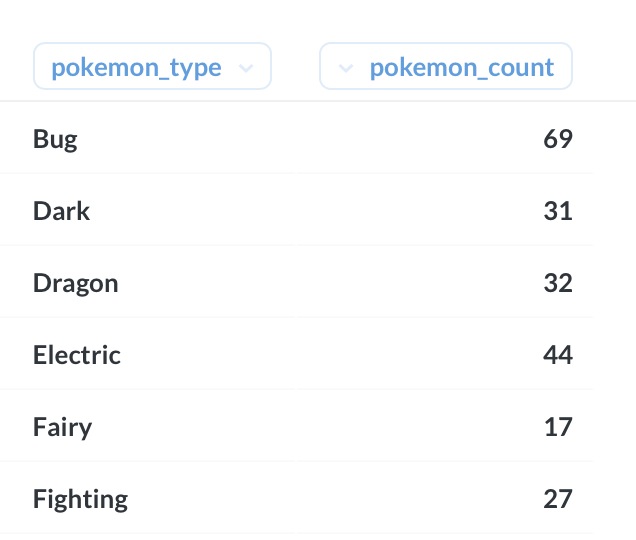

Вывод, конечно же, можно сортировать по столбцу с агрегированием.

**Представим ТОП существующих типов покемонов.**

```sql
SELECT
    type1 AS pokemon_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY pokemon_type
ORDER BY COUNT(*) DESC
```

>**Обратите внимание!** Мы использовали в группировке не название столбца, а его алиас.

**Задание 4.1**

Напишите запрос, который выведет:

- число различных дополнительных типов (столбец `additional_types_count`),
- среднее число очков здоровья (столбец `avg_hp`),
- сумму показателей атаки (столбец `attack_sum`) в разбивке по основным типам (столбец `primary_type`).

Отсортируйте результат по числу дополнительных типов в порядке убывания, при равенстве — по основному типу в алфавитном порядке. Столбцы к выводу (обратите внимание на порядок!): `primary_type`, `additional_types_count`, `avg_hp`, `attack_sum`.

```sql
SELECT
    type1 AS primary_type,
    COUNT(DISTINCT type2) AS "additional_types_count",
    AVG(hp) AS "avg_hp",
    SUM(attack) AS "attack_sum"
FROM sql.pokemon
GROUP BY primary_type
ORDER BY additional_types_count DESC,
    primary_type ASC
```

Мы можем осуществлять **группировку по нескольким столбцам**.

```sql
SELECT /*выбор*/
    type1 AS primary_type, /*столбец type1; присвоить алиас primary_type*/
    type2 AS additional_type, /*столбец type2; присвоить алиас additional_type*/
    COUNT(*) AS pokemon_count /*подсчёт всех строк присвоить алиас pokemon_count*/
FROM sql.pokemon /*из таблицы sql.pokemon*/
GROUP BY 1, 2 /*группировка по столбцам 1 и 2*/
ORDER BY 1, 2 NULLS FIRST /*сортировка по столбцам 1 и 2; сначала нули*/
```

>**Обратите внимание!** В группировке можно указывать порядковый номер столбца так же, как мы делали это в прошлом модуле для сортировки.

`GROUP BY` можно использовать и без агрегатных функций. Тогда его действие будет равносильно действию `DISTINCT`.

```sql
SELECT DISTINCT
    type1
FROM sql.pokemon
```
**=**
```sql
SELECT
    type1
FROM sql.pokemon
GROUP BY type1
```

### <center> 5. Фильтрация агрегированных строк

✍ Если ключевое слово `WHERE` определяет фильтрацию строк **до агрегирования**, то для фильтрации **уже агрегированных данных** применяется ключевое слово `HAVING`.

>**Важно!** `HAVING` обязательно пишется после `GROUP BY`.

Выведем *типы покемонов* и их *средний показатель атаки*, при этом оставим только тех, у кого *средняя атака больше 90*.

```sql
SELECT
    type1 AS primary_type,
    AVG(attack) AS avg_attack
FROM sql.pokemon
GROUP BY primary_type
HAVING AVG(attack) > 90 /*фильтровать по среднему значению attack, превышающему 90*/
```

В `HAVING` вы можете использовать все те же условия, что и в `WHERE`.

**ДОПОЛНИТЕЛЬНО**

Об отличиях `HAVING` от `WHERE` можно прочитать в [официальной документации.](https://postgrespro.ru/docs/postgresql/11/tutorial-agg)

**ВМЕСТО РЕЗЮМЕ**

В общем виде синтаксис оператора `SELECT`, с учётом имеющихся на данный момент знаний, представляем следующим образом:

```sql
SELECT [ALL | DISTINCT] список столбцов|*
FROM список_имен_таблиц
[WHERE Условие_поиска]
[GROUP BY список_имен столбцов]
[HAVING условие_поиска]
[ORDER BY имя_столбца [ASC | DESC],...]
```

>**Обратите внимание!** В квадратных скобках указаны необязательные предложения: они могут отсутствовать в операторе `SELECT`.

**Задание 5.1**

Напишите запрос, который выведет основной и дополнительный типы покемонов (столбцы `primary_type` и `additional_type`) для тех, у кого средний показатель атаки больше 100 и максимальный показатель очков здоровья меньше 80.

```sql
SELECT
    type1 as primary_type,
    type2 as additional_type
FROM sql.pokemon
GROUP BY primary_type, additional_type
HAVING AVG(attack) > 100 AND MAX(hp) < 80

```

**Задание 5.2**

Напишите запрос, чтобы для покемонов, чьё имя (`name`) начинается с `S`, вывести столбцы с их основным типом (`primary_type`) и общим числом покемонов этого типа (`pokemon_count`). Оставьте только те типы, у которых *средний показатель защиты* больше 80. Выведите топ-3 типов по числу покемонов в них.

```sql
SELECT 
    type1 AS primary_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
WHERE name LIKE 'S%'
GROUP BY primary_type
HAVING AVG(defense) > 80
ORDER BY pokemon_count DESC
LIMIT 3
```


ИТОГО: СТРУКТУРА SQL ЗАПРОСА

```sql
SELECT
    столбец1 AS новое_название,
    столбец2,
    АГРЕГАТ(столбец3)
FROM таблица
WHERE (условие1 OR условие2)
    AND условие3
GROUP BY столбец1, столбец2
HAVING АГРЕГАТ(столбец3) > 5
ORDER BY сортировка1, сортировка2
OFFSET 1 LIMIT 2
```

**Задание 6.1**

Сколько различных значений показателей атаки есть у покемонов с типом *Water* (основным или дополнительным)?

```sql
SELECT
    COUNT(DISTINCT attack)
FROM sql.pokemon
WHERE type1 = 'Water' OR type2 = 'Water'
```


**Задание 6.2**

Напишите запрос, который выведет основной и дополнительный типы покемонов и средние значения по каждому показателю (столбцы `avg_hp`, `avg_attack`, `avg_defense`, `avg_speed`).Оставьте только те пары типов, у которых **сумма этих четырёх показателей более 400**.

```sql
SELECT
    type1,
    type2,
    AVG(hp) AS avg_hp,
    AVG(attack) AS avg_attack,
    AVG(defense) AS avg_defense,
    AVG(speed) AS avg_speed
FROM sql.pokemon
GROUP BY type1, type2
HAVING (AVG(hp) + AVG(attack) + AVG(defense) + AVG(speed)) > 400
ORDER BY (AVG(hp) + AVG(attack) + AVG(defense) + AVG(speed)) DESC
```

**Задание 6.3**

Напишите запрос, который выведет *столбцы с основным типом покемона* и *общим количеством покемонов этого типа*. Учитывайте только тех покемонов, у кого или *показатель атаки*, или *показатель защиты* принимает значение между 50 и 100 включительно. Оставьте только те типы покемонов, у которых* максимальный показатель здоровья не больше 125*. Выведите только тот тип, который находится *на пятом месте по количеству покемонов.*

```sql
SELECT
    type1,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
WHERE (attack BETWEEN 50 AND 100) OR (defense BETWEEN 50 AND 100)
GROUP BY type1
HAVING MAX(hp) <= 125
ORDER BY pokemon_count DESC
OFFSET 4 LIMIT 1
```